In [1]:
import sys
# change accordingly
sys.path.append('/Users/monazehni/repos/2D-point-source-localization/python/')
import math
import argparse
import numpy as np
import matplotlib.pyplot as plt

from point_gen import PointGen2D
from feature_gen import FeatureGen2D
from utils_python import plot_feature_baseline, gen_prony_mat, plot_roots, prony

## Setting the parameters:

In [2]:
def arg_parse():
    """
    Parses the passed arguments

    :return: the parsed arguments
    """
    parser = argparse.ArgumentParser()
    parser.add_argument('-numPoint', type=int, default=4, help='the number of points')
    parser.add_argument('-numProj', type=int, default=2000, help='the number of projection lines')
    parser.add_argument('-distType', type=str, default='pair', help='the distance use to constrain the generation of the point source model')
    parser.add_argument('-constrained', action='store_true', default=False, help='to apply the minimum separation constraint to generation of the point sources or not')
    parser.add_argument('-minDist', type=float, default=0.1, help='the minimum distance')
    parser.add_argument('-L', type=int, default=3000, help='the number of discretizations of the projection lines')
    parser.add_argument('-R', type=float, default=1., help='the maximum distance of the points from the center')
    parser.add_argument('-sigmaG', type=float, default=0.005, help='the std of the Gaussians used to generate the point sources')
    parser.add_argument('-snr', type=float, default=1000, help='the signal to noise ratio')
    parser.add_argument('-seed', type=int, default=1, help='the random seed')
    args = parser.parse_args()
    return args

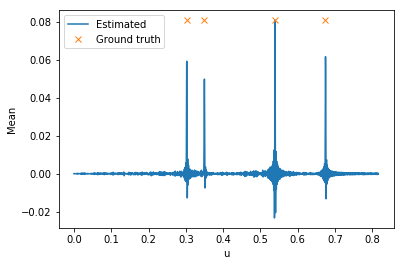

<Figure size 432x288 with 0 Axes>

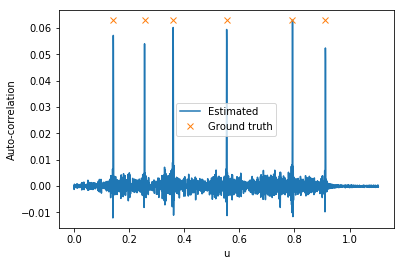

Error radial: 0.024795
Error pairwise: 0.663741


<Figure size 432x288 with 0 Axes>

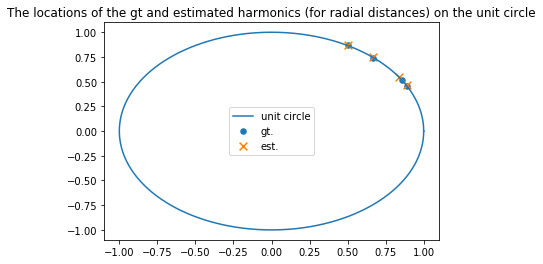

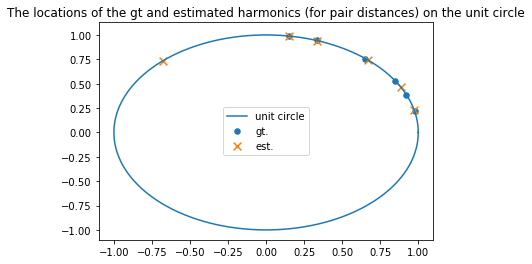

In [17]:
    # generating the point-source model
    args = arg_parse()
    args.constrained = True
    np.random.seed(args.seed)
    fcutoff = np.round(2 * args.L)
    points = PointGen2D(args)
    supp = 3 * np.max(points.radialDist) # the index by which we multiply should be larger than 2
    pixelSize = supp / (2 * args.L + 1)
    proj, nVar = points.proj_1d_point(pixelSize, args.snr)

    # generate the features
    feature = FeatureGen2D(proj, args.numPoint, fcutoff, pixelSize)
    # mean feature
    uMax = 1.1 * np.max(points.radialDist)
    muSample, muSampleDist, u = feature.mean_sample(uMax)
    plot_feature_baseline(muSampleDist, u, points.radialDist, 'Mean')
    # auto-correlation feature
    uMax = 1.1 * np.max(points.pairDist)
    corrSample, distCorr, u = feature.corr_sample(nVar, uMax)
    plot_feature_baseline(distCorr, u, points.pairDist, 'Auto-correlation')

    # applying the prony method to the features
    # mean feature, radial distances
    start_r = 10
    M = proj.shape[0]
    recDistRadial, recRootRadial, errorRadial = prony(muSample, points.radialDist, start_r, M, points.numPoint, pixelSize, mode='radial')
    print('Error radial: %f' %errorRadial)
    plot_roots(recRootRadial, points.radialDist, pixelSize, M, 'radial')
    # auto-correlation feature, pairwise distances
    recDistPair, recRootPair, errorPair = prony(corrSample, points.pairDist, start_r, M, points.numPoint, pixelSize, mode='pairwise')
    print('Error pairwise: %f' %errorPair)
    plot_roots(recRootPair, points.pairDist, pixelSize, M, 'pair')

# np.random.seed(args.seed)
# fcutoff = np.round(2 * args.L)
# points = PointGen2D(args)
# supp = 3 * np.max(points.radialDist) # the index by which we multiply should be larger than 2
# pixelSize = supp / (2 * args.L + 1)
# proj, nVar = points.proj_1d_point(pixelSize, args.snr)

# # plotting the point source model and examples of the projections
# plt.figure()
# plt.scatter(points.X, points.Y)
# plt.xlabel('x',fontsize=10); plt.ylabel('y',fontsize=10); plt.title('Point sources on the 2D plane')

# plt.figure(figsize=(10, 2.5))
# plt.subplot(131); plt.plot(proj[:,10]); plt.title('Proj #1')
# plt.subplot(132); plt.plot(proj[:,500]); plt.title('Proj #2')
# plt.subplot(133); plt.plot(proj[:,1000]); plt.title('Proj #3')
# plt.show()
# print(points.radialDist)

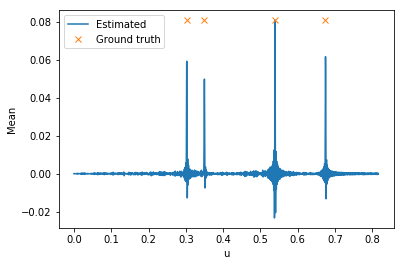

<Figure size 432x288 with 0 Axes>

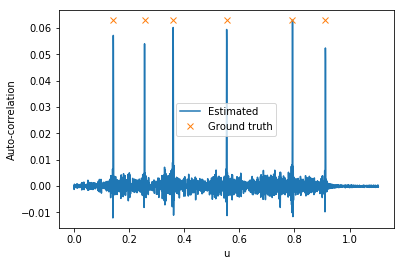

Error radial: 0.024795
Error pairwise: 0.663741


<Figure size 432x288 with 0 Axes>

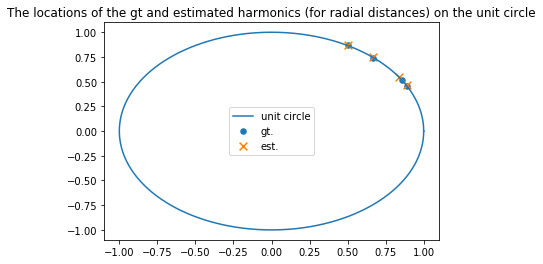

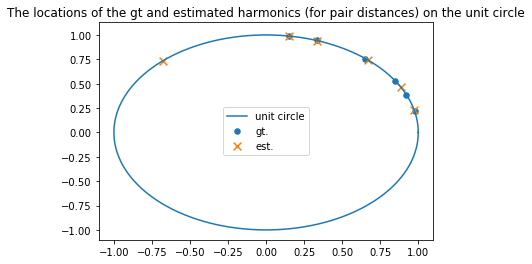

In [8]:
    # generate the features
    feature = FeatureGen2D(proj, args.numPoint, fcutoff, pixelSize)
    # mean feature
    uMax = 1.1 * np.max(points.radialDist)
    muSample, muSampleDist, u = feature.mean_sample(uMax)
    plot_feature_baseline(muSampleDist, u, points.radialDist, 'Mean')
    # auto-correlation feature
    uMax = 1.1 * np.max(points.pairDist)
    corrSample, distCorr, u = feature.corr_sample(nVar, uMax)
    plot_feature_baseline(distCorr, u, points.pairDist, 'Auto-correlation')

    # applying the prony method to the features
    # mean feature, radial distances
    start_r = 10
    M = proj.shape[0]
    recDistRadial, recRootRadial, errorRadial = prony(muSample, points.radialDist, start_r, M, points.numPoint, pixelSize, mode='radial')
    print('Error radial: %f' %errorRadial)
    plot_roots(recRootRadial, points.radialDist, pixelSize, M, 'radial')
    # auto-correlation feature, pairwise distances
    recDistPair, recRootPair, errorPair = prony(corrSample, points.pairDist, start_r, M, points.numPoint, pixelSize, mode='pairwise')
    print('Error pairwise: %f' %errorPair)
    plot_roots(recRootPair, points.pairDist, pixelSize, M, 'pair')

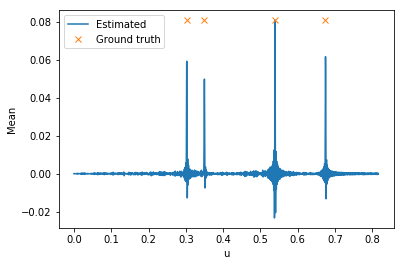

<Figure size 432x288 with 0 Axes>

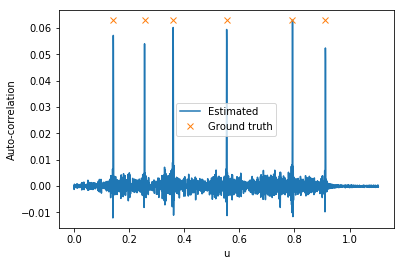

[0.14307452 0.25628507 0.36009247 0.5542066  0.79306599 0.91268266]


<Figure size 432x288 with 0 Axes>

In [9]:
# plotting the features
plot_feature_baseline(muSampleDist, uMean, points.radialDist, feature='Mean')
plot_feature_baseline(distCorr, uCorr, points.pairDist, feature='Auto-correlation')
print(points.pairDist)

## Extract radial distances

Error radial: 0.024795
Error pairwise: 0.663741


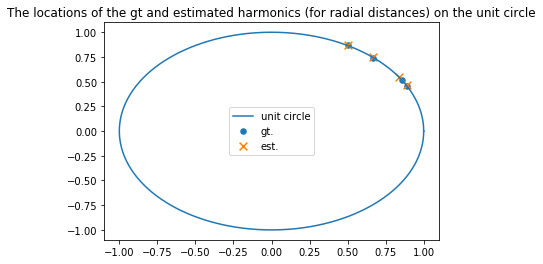

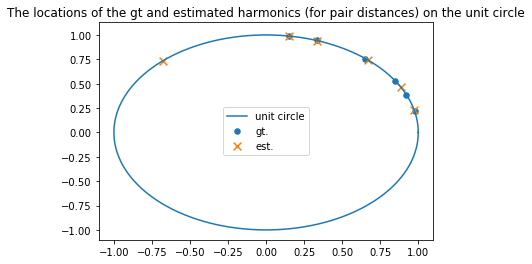

In [7]:
# applying the prony method to the features
# mean feature, radial distances
start_r = 10
M = proj.shape[0]
recDistRadial, recRootRadial, errorRadial = prony(muSample, points.radialDist, start_r, M, points.numPoint, pixelSize, mode='radial')
print('Error radial: %f' %errorRadial)
plot_roots(recRootRadial, points.radialDist, pixelSize, M, 'radial')
# auto-correlation feature, pairwise distances
recDistPair, recRootPair, errorPair = prony(corrSample, points.pairDist, start_r, M, points.numPoint, pixelSize, mode='pairwise')
print('Error pairwise: %f' %errorPair)
plot_roots(recRootPair, points.pairDist, pixelSize, M, 'pair')

Text(0.5, 0, 'Index of the point')

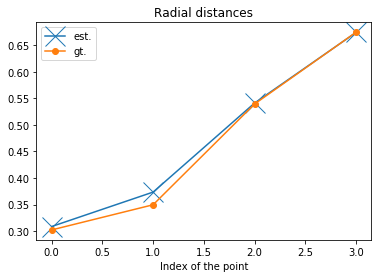

In [11]:
# results:
# print('The error between the recovered and ground truth radial distances: %f' %error)
plt.figure()
plt.plot(np.sort(recDistRadial), label='est.', marker='x', markersize=20)
plt.plot(np.sort(points.radialDist), label='gt.', marker='o')
plt.legend()
plt.title('Radial distances')
plt.xlabel('Index of the point')

## Extract pairwise distances

In [ ]:
# apply the same thing for the pairwise distances
start_r = 10
M_prony = args.numPoint * 30;
r_interval = np.arange(start_r, start_r+M_prony)
b_pairwise = corrSample[r_interval];
                
M = proj.shape[0]
prony_mat, prony_vec = gen_prony_mat((b_pairwise/2.)*np.sqrt(r_interval), args.numPoint * (args.numPoint-1));
c = np.dot(np.linalg.pinv(prony_mat), prony_vec)
c = np.concatenate((np.ones((1, 1)), c), axis=0)
r_pair = np.roots(c.squeeze());
                
# extract the geometry information from the roots
tmp = np.angle(r_pair);
# choosing the points that are in the first half of the circle
ind1 = (tmp<=math.pi);
ind2 = (tmp>=0);
index = ind1 & ind2;
                
# choosing the (args.numPoint*(args.numPoint-1))//2 roots that are closest to the unit circle
r_pair = r_pair[index]
I = np.argsort(np.absolute(1-np.absolute(r_pair)))
r_pair = r_pair[I[0:(args.numPoint*(args.numPoint-1))//2]]
r_rec = (np.angle(r_pair) * pixelSize * M) / (2 * math.pi)
                   
# error between the recovered and true radial distances
error = np.linalg.norm(np.sort(r_rec)-np.sort(points.pairDist))

Text(0.5, 0, 'Index of the point')

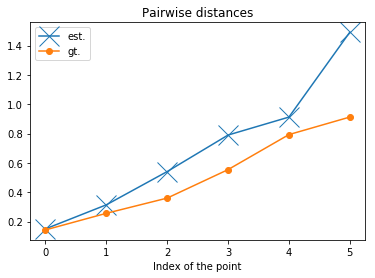

In [14]:
# results
# print('The error between the recovered and ground truth pairwise distances: %f' %error)
plt.figure()
plt.plot(np.sort(recDistPair), label='est.', marker='x', markersize=20)
plt.plot(np.sort(points.pairDist), label='gt.', marker='o')
plt.legend()
plt.title('Pairwise distances')
plt.xlabel('Index of the point')

# plot_roots(r_pair, points.pairDist, pixelSize, M, 'pairwise')